In [34]:
import numpy as np 
import pandas as pd 
import yfinance as yf
import datetime
import math
from math import isnan
from datetime import date
from datetime import timedelta
from ta.trend import SMAIndicator
import warnings
warnings.filterwarnings('ignore')

In [37]:
def Add_Indicators(Data):
    
    SMA100 = SMAIndicator(close = Data["Close"], window = 100, fillna = True)
    SMA200 = SMAIndicator(close = Data["Close"], window = 200, fillna = True)
    
    Data["SMA100"] = SMA100.sma_indicator()
    Data["SMA200"] = SMA200.sma_indicator()

    return Data

In [2]:
#Getting the list of tickers
df = pd.read_csv('Nifty_100.csv', header= 0)
Tickers = df["Symbol"]
Tickers = Tickers.astype(str) + ".NS"
Tickers = list(Tickers)

In [3]:
#Start Date for the analysis
start_date = "2010-01-01"
today = datetime.datetime.today()

In [5]:
#Downloading Data
Data = yf.download(Tickers, start=start_date, period="1d", interval= "1wk", threads =True, group_by = "ticker")
Nifty100 = yf.download("^CNX100", start=start_date, period="1d", interval= "1d", threads =True, group_by = "ticker")

[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
Data

HDFCLIFE.NS                                                      \
                  Open        High         Low  Close Adj Close     Volume   
Date                                                                         
2009-12-28         NaN         NaN         NaN    NaN       NaN        NaN   
2010-01-04         NaN         NaN         NaN    NaN       NaN        NaN   
2010-01-11         NaN         NaN         NaN    NaN       NaN        NaN   
2010-01-18         NaN         NaN         NaN    NaN       NaN        NaN   
2010-01-19         NaN         NaN         NaN    NaN       NaN        NaN   
...                ...         ...         ...    ...       ...        ...   
2021-08-05         NaN         NaN         NaN    NaN       NaN        NaN   
2021-08-09  674.150024  678.200012  661.349976  670.5     670.5  8036903.0   
2021-08-11         NaN         NaN         NaN    NaN       NaN        NaN   
2021-08-12         NaN         NaN         NaN    NaN       NaN        NaN   
2021-08-13  675.000000  678.200012  668.599976  670.5     670.5  1358255.0   

           AMBUJACEM.NS                                      ...  \
                   Open        High         Low       Close  ...   
Date                                                         ...   
2009-12-28   104.949997  104.949997  104.949997  104.949997  ...   
2010-01-04   105.400002  107.949997  103.500000  105.900002  ...   
2010-01-11   105.599998  114.500000  102.400002  113.250000  ...   
2010-01-18   114.500000  114.500000  104.250000  105.699997  ...   
2010-01-19          NaN         NaN         NaN         NaN  ...   
...                 ...         ...         ...         ...  ...   
2021-08-05          NaN         NaN         NaN         NaN  ...   
2021-08-09   407.850006  409.950012  391.799988  402.450012  ...   
2021-08-11          NaN         NaN         NaN         NaN  ...   
2021-08-12          NaN         NaN         NaN         NaN  ...   
2021-08-13   401.500000  404.950012  396.200012  402.450012  ...   

            NESTLEIND.NS                                       ADANIPORTS.NS  \
                     Low         Close     Adj Close    Volume          Open   
Date                                                                           
2009-12-28    527.049988    527.049988    454.885437       0.0    110.690002   
2010-01-04    527.049988   2494.649902   2153.078369     648.0    111.000000   
2010-01-11   2400.000000   2513.500000   2169.347656  408793.0    120.599998   
2010-01-18   2478.000000   2529.000000   2182.725098    3724.0    128.309998   
2010-01-19           NaN           NaN           NaN       NaN           NaN   
...                  ...           ...           ...       ...           ...   
2021-08-05           NaN           NaN           NaN       NaN           NaN   
2021-08-09  18020.650391  18269.550781  18269.550781  192705.0    714.000000   
2021-08-11           NaN           NaN           NaN       NaN           NaN   
2021-08-12           NaN           NaN           NaN       NaN           NaN   
2021-08-13  18131.699219  18269.550781  18269.550781   41102.0    704.450012   

                                                                        
                  High         Low       Close   Adj Close      Volume  
Date                                                                    
2009-12-28  110.690002  110.690002  110.690002  103.589745         0.0  
2010-01-04  123.209999  110.699997  119.330002  111.675529  13347810.0  
2010-01-11  132.550003  105.000000  129.809998  121.483276  19770515.0  
2010-01-18  131.600006  117.599998  123.080002  115.184982   7551360.0  
2010-01-19         NaN         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
2021-08-05         NaN         NaN         NaN         NaN         NaN  
2021-08-09  717.000000  683.250000  704.150024  704.150024  28215206.0  
2021-08-11         NaN         NaN       

In [7]:
Data["SBIN.NS"].isnull().Open.sum()

619

In [8]:
#Dropping Excess Entries from the weekly dataframe
Drop_List = np.array([])
i = 0
while(i < Data.shape[0]-2):
    if(Data.index[i+1] != Data.index[i] + timedelta(days =7)):
        Data = Data.drop(Data.index[i+1], axis = 0)
        continue
    i = i + 1


In [9]:
Data["SBIN.NS"].isnull().Open.sum()

0

In [10]:
Data["ICICIGI.NS"].isnull().Open.sum()

404

In [11]:
stock = np.array([])
empty = np.array([])
for i in Tickers:
    empty = np.append(empty,Data[i].isnull().Close.sum())
    stock = np.append(stock, i)
new_row = {"Stock" : stock, "Empty_Values" : empty}   
Null = pd.DataFrame(new_row)  

In [12]:
Null[Null.Empty_Values > 0].count()

Stock           19
Empty_Values    19
dtype: int64

In [13]:
#Stocks with Missing Data.
Null[Null.Empty_Values > 0]

,Stock,Empty_Values
3,ADANIGREEN.NS,442.0
5,ADANITRANS.NS,291.0
6,ALKEM.NS,312.0
11,DMART.NS,377.0
17,BANDHANBNK.NS,430.0
26,COALINDIA.NS,44.0
34,GLAND.NS,568.0
38,HDFCAMC.NS,449.0
40,HDFCLIFE.NS,411.0
46,HDFC.NS,101.0


In [14]:
Data.shape

(608, 600)

In [15]:
#Dropping stocks with missing values greater than 300
Drop_List = list(Null[Null.Empty_Values > 100].Stock.unique())
Data = Data.drop(Drop_List, axis= 1)

for i in range(len(Drop_List)):
    Tickers.remove(Drop_List[i])
    
#Number of stocks left after cleaning
len(Tickers)

84

In [16]:
#Data.drop(Data.index[0:-1:2], axis = 0 )
#Drop odd Index to make the period of Dataframe = 2 Weeks
#odd = np.array([])
#for i in range(1, int(Data.shape[0]/2) + 1):
#    odd = np.append(odd, int(2*i - 1) )
    

In [17]:

i = 0

#Code to make period of dataframe = 2 weeks
while(i <= Data.shape[0] - 2):
    Data = Data.drop(Data.index[i+1], axis = 0)
    i = i + 1

#Code to make period of dataframe = 3 weeks  
#while(i <= Data.shape[0] - 2):
#    Data = Data.drop(Data.index[i+1], axis = 0)
#    Data = Data.drop(Data.index[i+1], axis = 0)
#    i = i + 1

Data = Data.drop(Data.index[0], axis = 0)  

In [18]:
Data

AMBUJACEM.NS                                                  \
                   Open        High         Low       Close   Adj Close   
Date                                                                      
2010-01-11   105.599998  114.500000  102.400002  113.250000   88.981079   
2010-01-25   105.699997  108.400002   99.050003  101.800003   79.984764   
2010-02-08   101.400002  107.750000   98.800003  106.699997   83.834709   
2010-02-22   106.250000  108.250000  101.800003  106.949997   84.977074   
2010-03-08   110.199997  118.500000  109.800003  116.449997   92.525291   
...                 ...         ...         ...         ...         ...   
2021-06-14   337.899994  348.899994  332.500000  341.299988  341.299988   
2021-06-28   349.750000  350.850006  337.250000  339.250000  339.250000   
2021-07-12   364.100006  389.000000  363.649994  383.049988  383.049988   
2021-07-26   402.500000  415.350006  390.950012  411.149994  411.149994   
2021-08-09   407.850006  409.950012  391.799988  402.450012  402.450012   

                       EICHERMOT.NS                                         \
                Volume         Open         High          Low        Close   
Date                                                                         
2010-01-11  13818320.0    65.000000    65.900002    60.305000    62.845001   
2010-01-25  10735516.0    60.700001    63.064999    53.264999    56.785000   
2010-02-08   8183830.0    58.000000    59.000000    53.500000    53.880001   
2010-02-22   7449586.0    58.990002    59.590000    55.500000    58.400002   
2010-03-08  16468278.0    67.885002    67.885002    61.500000    62.735001   
...                ...          ...          ...          ...          ...   
2021-06-14  16102852.0  2740.000000  2787.050049  2644.199951  2707.550049   
2021-06-28   9858066.0  2723.500000  2752.949951  2642.000000  2661.000000   
2021-07-12  25381468.0  2720.000000  2744.850098  2607.800049  2617.250000   
2021-07-26  25312618.0  2544.800049  2598.000000  2509.000000  2530.250000   
2021-08-09  14934240.0  2746.000000  2768.750000  2523.250000  2546.800049   

            ...  NESTLEIND.NS                                        \
            ...           Low         Close     Adj Close    Volume   
Date        ...                                                       
2010-01-11  ...   2400.000000   2513.500000   2169.347656  408793.0   
2010-01-25  ...   2498.600098   2533.000000   2186.177734    9092.0   
2010-02-08  ...   2570.000000   2737.250000   2362.461670   93622.0   
2010-02-22  ...   2526.100098   2626.899902   2267.220703   36311.0   
2010-03-08  ...   2690.000000   2715.449951   2343.646240   69949.0   
...         ...           ...           ...           ...       ...   
2021-06-14  ...  17417.599609  17670.650391  17670.650391  424138.0   
2021-06-28  ...  17453.500000  17602.000000  17602.000000  220536.0   
2021-07-12  ...  17450.000000  17654.199219  17654.199219  173690.0   
2021-07-26  ...  17655.050781  17702.650391  17702.650391  499195.0   
2021-08-09  ...  18020.650391  18269.550781  18269.550781  192705.0   

           ADANIPORTS.NS                                                  \
                    Open        High         Low       Close   Adj Close   
Date                                                                       
2010-01-11    120.599998  132.550003  105.000000  129.809998  121.483276   
2010-01-25    123.800003  124.000000  115.000000  119.040001  111.404106   
2010-02-08    130.000000  130.589996  127.000000  127.989998  120.260910   
2010-02-22    131.979996  136.199997  127.199997  134.770004  126.631477   
2010-03-08    142.779999  147.300003  136.460007  139.860001  131.414124   
...                  ...         ...         ...         ...         ...   
2021-06-14    755.799988  802.900024  638.099976  694.349976  689.519409   
2021-06-28    719.000000  729.950012  700.000000  710.400024  710.400024   
2021-07-12    734.400024  735.650024

In [19]:
#Make PCT Change Data Frame
PCT = pd.DataFrame(columns = Tickers)
#Add 2/3 Weeks Percent Change Data 
for ticker in Tickers:
    six_month_change = np.array([])
    for i in range(11,len(Data)):
        six_month_change = np.append(six_month_change, (Data[ticker]["Close"][i] - Data[ticker]["Close"][i-11])/Data[ticker]["Close"][i]  )
    PCT[ticker] = six_month_change
PCT.index = Data.index[11:]    
Data = Data[11:]

In [19]:
PCT

,ACC.NS,ABBOTINDIA.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,...,TECHM.NS,TITAN.NS,TORNTPHARM.NS,UPL.NS,ULTRACEMCO.NS,UBL.NS,MCDOWELL-N.NS,VEDL.NS,WIPRO.NS,YESBANK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-14,-0.137687,0.288380,0.111766,0.091412,0.037808,0.099056,0.214704,-0.058319,0.110359,0.243102,...,-0.545461,0.310253,0.267316,0.123752,-0.080044,0.279178,-0.007521,-0.163133,-0.077978,0.045731
2010-06-28,-0.010023,0.369521,0.175119,0.167494,0.097117,0.092850,0.201913,0.082058,0.170951,0.288135,...,-0.327464,0.353812,0.209335,0.147559,-0.068290,0.312139,0.029547,0.000432,-0.008221,0.069268
2010-07-12,-0.088196,0.341565,0.103709,0.152160,0.019752,0.155019,0.213925,0.069424,0.238699,0.257580,...,-0.220262,0.349875,0.215775,0.136325,-0.184357,0.247637,0.048884,-0.114931,0.021952,0.207213
2010-07-26,-0.110830,0.205169,0.166567,0.069461,0.092105,0.128882,0.304761,0.058875,0.162976,0.323791,...,-0.272279,0.377628,0.228383,0.178067,-0.203901,0.435620,0.022274,-0.108235,0.014068,0.199729
2010-08-09,-0.184242,0.234122,0.234102,0.123519,0.001715,0.102656,0.277410,-0.022475,0.133376,0.307429,...,-0.274305,0.395446,0.071797,0.163545,-0.240139,0.455577,-0.001376,-0.224547,-0.026578,0.209502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-14,0.141920,0.093165,0.645513,0.239649,0.226194,0.195297,0.149744,0.017271,0.083458,0.140817,...,0.059214,0.136767,0.064189,0.353280,0.185490,0.052387,0.058045,0.302205,0.202346,-0.280000
2021-06-28,0.192930,0.151664,0.643719,0.282517,0.282682,0.313926,0.198885,0.089469,0.116899,0.040607,...,0.117496,0.190597,0.115986,0.298618,0.207243,0.101548,0.126425,0.384659,0.224099,-0.162362
2021-07-12,0.170756,0.174175,0.484808,0.103258,0.275682,0.272816,0.168334,0.046743,0.026908,-0.051908,...,0.101482,0.118648,0.130034,0.360277,0.127792,0.134402,0.149461,0.330826,0.234963,-0.223881


In [21]:
Data

AMBUJACEM.NS                                                  \
                   Open        High         Low       Close   Adj Close   
Date                                                                      
2010-06-14   115.849998  118.500000  113.650002  117.699997   93.518478   
2010-06-28   116.699997  124.000000  110.050003  112.750000   89.585457   
2010-07-12   112.300003  113.449997  107.949997  108.849998   86.486717   
2010-07-26   115.949997  122.000000  114.500000  117.800003   93.597946   
2010-08-09   114.449997  122.000000  113.800003  116.650002   93.642601   
...                 ...         ...         ...         ...         ...   
2021-06-14   337.899994  348.899994  332.500000  341.299988  341.299988   
2021-06-28   349.750000  350.850006  337.250000  339.250000  339.250000   
2021-07-12   364.100006  389.000000  363.649994  383.049988  383.049988   
2021-07-26   402.500000  415.350006  390.950012  411.149994  411.149994   
2021-08-09   407.850006  409.950012  391.799988  402.450012  402.450012   

                       EICHERMOT.NS                                         \
                Volume         Open         High          Low        Close   
Date                                                                         
2010-06-14   7458675.0    84.400002    97.695000    84.400002    92.214996   
2010-06-28   6128996.0    90.000000    96.699997    88.900002    90.190002   
2010-07-12   7765552.0    94.410004    96.000000    93.430000    94.519997   
2010-07-26  12872314.0    99.000000   101.400002    96.510002    98.410004   
2010-08-09   6720991.0   100.800003   115.000000    98.224998   109.214996   
...                ...          ...          ...          ...          ...   
2021-06-14  16102852.0  2740.000000  2787.050049  2644.199951  2707.550049   
2021-06-28   9858066.0  2723.500000  2752.949951  2642.000000  2661.000000   
2021-07-12  25381468.0  2720.000000  2744.850098  2607.800049  2617.250000   
2021-07-26  25312618.0  2544.800049  2598.000000  2509.000000  2530.250000   
2021-08-09  14934240.0  2746.000000  2768.750000  2523.250000  2546.800049   

            ...  NESTLEIND.NS                                        \
            ...           Low         Close     Adj Close    Volume   
Date        ...                                                       
2010-06-14  ...   2875.000000   2951.899902   2566.900879   15461.0   
2010-06-28  ...   2852.750000   2978.500000   2590.031738  155087.0   
2010-07-12  ...   2953.000000   3022.899902   2628.641357   51798.0   
2010-07-26  ...   2931.000000   3020.649902   2626.683594   37876.0   
2010-08-09  ...   2769.949951   2800.399902   2435.159912  153387.0   
...         ...           ...           ...           ...       ...   
2021-06-14  ...  17417.599609  17670.650391  17670.650391  424138.0   
2021-06-28  ...  17453.500000  17602.000000  17602.000000  220536.0   
2021-07-12  ...  17450.000000  17654.199219  17654.199219  173690.0   
2021-07-26  ...  17655.050781  17702.650391  17702.650391  499195.0   
2021-08-09  ...  18020.650391  18269.550781  18269.550781  192705.0   

           ADANIPORTS.NS                                                  \
                    Open        High         Low       Close   Adj Close   
Date                                                                       
2010-06-14    137.000000  144.369995  135.820007  142.869995  134.242325   
2010-06-28    139.460007  148.300003  137.059998  142.990005  134.355103   
2010-07-12    146.399994  152.979996  143.800003  150.960007  141.843811   
2010-07-26    145.520004  147.720001  143.600006  144.830002  136.083984   
2010-08-09    158.000000  165.979996  155.199997  159.570007  149.933853   
...                  ...         ...         ...         ...         ...   
2021-06-14    755.799988  802.900024  638.099976  694.349976  689.519409   
2021-06-28    719.000000  729.950012  700.000000  710.400024  710.400024   
2021-07-12    734.400024  735.650024

In [39]:
Nifty100 = Add_Indicators(Nifty100)
Nifty100

,Open,High,Low,Close,Adj Close,Volume,EMA100,EMA200,SMA100,SMA200
Date,,,,,,,,,,
2010-01-04,5098.500000,5158.049805,5098.500000,5153.549805,5153.549805,2432500,5153.549805,5153.549805,5153.549805,5153.549805
2010-01-05,5188.549805,5211.350098,5182.100098,5203.799805,5203.799805,3755200,5154.544854,5154.049805,5178.674805,5178.674805
2010-01-06,5221.649902,5228.250000,5191.100098,5214.000000,5214.000000,3292300,5155.722184,5154.646324,5190.449870,5190.449870
2010-01-07,5213.450195,5229.500000,5175.950195,5191.700195,5191.700195,2849900,5156.434620,5155.015019,5190.762451,5190.762451
2010-01-08,5193.450195,5206.500000,5165.850098,5175.750000,5175.750000,3145000,5156.817102,5155.221337,5187.759961,5187.759961
...,...,...,...,...,...,...,...,...,...,...
2021-08-09,16524.050781,16554.449219,16404.900391,16483.449219,16483.449219,0,15546.254623,14681.380106,15493.570537,14668.145254
2021-08-10,16505.000000,16578.650391,16407.500000,16493.849609,16493.849609,5338300,15565.018881,14699.414628,15508.100537,14691.397754
2021-08-11,16535.449219,16547.750000,16345.500000,16490.150391,16490.150391,5935700,15583.338316,14717.232894,15522.669043,14714.084004


In [40]:
fixed_date = PCT.index[10]

condition_date = Nifty100[Nifty100.index == fixed_date]
condition_date["SMA100"]

Date
2010-11-01    5602.932524
Name: SMA100, dtype: float64

In [94]:

#Active Trades shows current active trades
#Trades show total trades taken 

Trades = pd.DataFrame(columns =["Date", "Stock", "Buy/Sell", "Profit/Loss", "Amount", "Shares"])
investment = 1000000
available_balance = 0
Active_Trades = pd.DataFrame(columns =["Buy_Date", "Stock", "Buy_Amount", "Current_Amount", "Shares"])
balance = 0
equity = np.array([])
investment_eoy = np.array([])

#Loop on each row 
for j in range(Data.shape[0]):
    
    fixed_date = PCT.index[j]
    
    condition_date = Nifty100[Nifty100.index == fixed_date]
    if(condition_date.empty == True):
        fixed_date = PCT.index[j] + timedelta(days = 1)
        
    condition_date = Nifty100[Nifty100.index == fixed_date]   
        
    if(condition_date.empty == True):
        fixed_date = PCT.index[j] + timedelta(days = 2)
        
    condition_date = Nifty100[Nifty100.index == fixed_date]   
    
    if(condition_date.empty == True):
        fixed_date = PCT.index[j] + timedelta(days = 3)
        
    condition_date = Nifty100[Nifty100.index == fixed_date]        
    
    
    if(PCT.index[j-1].year < PCT.index[j].year ):
        equity = np.append(equity, (Active_Trades["Current_Amount"] * Active_Trades["Shares"]).sum() )
        investment_eoy = np.append(investment_eoy, investment)
    
    val = PCT.iloc[j,:].values
    names = PCT.columns
    top10 = dict()
    
    #Sort the pct change of a particular week of all stocks
    for i in range(len(names)):
        top10[names[i]] = val[i]
    top10 = sorted(top10.items(), key=lambda item: item[1], reverse = True)

    
    stocks = np.array([])
    pct_change = np.array([]) 
    close = np.array([])
    date = np.array([])
    for i in range(len(top10)):
        stocks = np.append(stocks, top10[i][0])
        pct_change = np.append(pct_change, top10[i][1])
        close   =  np.append(close, Data[top10[i][0]]["Close"][j])
        date = np.append(date, Data[top10[i][0]].index[j])

    
    #Make 2 Dataframes final and total final, final has only top 15 stocks of the week and total final has all the stocks
    final = {"Date" : date, "Stock": stocks, "PCT": pct_change, "Close" : close}
    final = pd.DataFrame(final)
    Total_Final = final.dropna().reset_index(drop = True)
    final = final.dropna()[:15].reset_index(drop = True)
    
    buy_price = np.array([])
    stock_name = np.array([])
    total_investment_in_stock = np.array([])
    buy_date = np.array([])    

    #Bear Selling 
    if(condition_date["SMA200"][0] > condition_date["SMA100"][0]):
        i = 0
        while(Active_Trades.shape[0] > 0 ):

            bear_stock = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Stock
            bear_sell  = Total_Final[Total_Final["Stock"] == Active_Trades["Stock"][i]].Close               #Selling Price
            bear_buy   = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Buy_Amount      #Buying Price
            bear_bs    = "Sell"
            bear_date  = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Buy_Date
            bear_shares = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Shares
            
            if(bear_sell.unique()[0] > bear_buy.unique()[0]):
                bear_pl = "Profit"
                bear_amount = bear_sell.unique()[0] - bear_buy.unique()[0]
            else:
                bear_pl = "Loss"
                bear_amount = bear_sell.unique()[0] - bear_buy.unique()[0] 
            
            investment = investment + int(bear_shares.unique()[0] * bear_sell.unique()[0])
            #Remove the stock from active trades
            Active_Trades = Active_Trades.drop( Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].index, axis = 0)
            Active_Trades = Active_Trades.reset_index(drop = True)
            
            bear = {"Date": bear_date, "Stock": bear_stock, "Buy/Sell": bear_bs, "Profit/Loss": bear_pl, "Amount" : bear_amount, "Shares": bear_shares}
            
            bear = pd.DataFrame(bear)
            Trades = Trades.append(bear, ignore_index= True)  #Adding the sold stock info in trades dataframe
            Trades = Trades.reset_index(drop = True)
    
    
    #Selling Phase
    if(Active_Trades.empty == False): #At first the dataframe will be empty
        i = 0
        while(i < Active_Trades.shape[0]):
            if(final[final["Stock"] == Active_Trades["Stock"][i]].empty == True):  #Sell the stock if it is not in top 15
                
                hist_stock = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Stock
                hist_sell  = Total_Final[Total_Final["Stock"] == Active_Trades["Stock"][i]].Close               #Selling Price
                hist_buy   = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Buy_Amount      #Buying Price
                hist_bs    = "Sell"
                hist_date  = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Buy_Date
                hist_shares = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Shares
                
                if(hist_sell.unique()[0] > hist_buy.unique()[0]):
                    hist_pl = "Profit"
                    hist_amount = hist_sell.unique()[0] - hist_buy.unique()[0]
                else:
                    hist_pl = "Loss"
                    hist_amount = hist_sell.unique()[0] - hist_buy.unique()[0] 
                
                investment = investment + int(hist_shares.unique()[0] * hist_sell.unique()[0])
                #Remove the stock from active trades
                Active_Trades = Active_Trades.drop( Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].index, axis = 0)
                Active_Trades = Active_Trades.reset_index(drop = True)
                
                hist = {"Date": hist_date, "Stock": hist_stock, "Buy/Sell": hist_bs, "Profit/Loss": hist_pl, "Amount" : hist_amount, "Shares": hist_shares}
                
                hist = pd.DataFrame(hist)
                Trades = Trades.append(hist, ignore_index= True)  #Adding the sold stock info in trades dataframe
                Trades = Trades.reset_index(drop = True)
                
            i = i + 1    
    
    
    
    i = 0
    
    #Buying Phase
    if(condition_date["SMA100"][0] >= condition_date["SMA200"][0]):
        equal_investment = 10 - Active_Trades.shape[0]
        while(Active_Trades.shape[0] < 10 and i < 15):
            if(investment < 0):
                break
            
            if(Active_Trades.shape[0] != 10):
                
                if(Active_Trades[Active_Trades["Stock"] == final["Stock"][i]].empty == False): #If stock is already present in the active trades then continue the loop
                    i = i + 1
                    Active_Trades[Active_Trades["Stock"] == final["Stock"][i]].Current_Amount = final["Close"][i]
                    continue        
            
            stock_name =  final["Stock"][i]
            buy_date   = final["Date"][i]
            buy_price = final["Close"][i]
            
            
            total_investment_in_stock =  int(investment/(equal_investment * final["Close"][i])) * final["Close"][i]
            buy_shares                =  int(investment/(equal_investment * final["Close"][i] ))
            investment = investment - investment/equal_investment
            i = i + 1
            
            Temp = {"Date": buy_date, "Stock": stock_name, "Buy/Sell": "Buy", "Profit/Loss": "NIL", "Amount" : buy_price, "Shares": buy_shares}
            
            #temp_available_balance = investment - total_investment_in_stock.sum()
            Trades = Trades.append(Temp, ignore_index = True)
            
            Temp1 = {"Buy_Date": buy_date, "Stock": stock_name, "Buy_Amount": buy_price, "Current_Amount" : buy_price, "Shares": buy_shares}
            
            Active_Trades  = Active_Trades.append(Temp1, ignore_index = True)
            
        
        #Updating the current price of all the active stocks
        for z in range(Active_Trades.shape[0]):
            if(Total_Final[Total_Final["Stock"] == Active_Trades["Stock"][z]].empty == True):
                continue
            Active_Trades["Current_Amount"][z] = Total_Final[Total_Final["Stock"] == Active_Trades["Stock"][z]].Close
        
    
    #available_balance = available_balance + temp_available_balance
    

In [95]:
Active_Trades

,Buy_Date,Stock,Buy_Amount,Current_Amount,Shares
0,2020-10-05,ADANIENT.NS,313.00000,1437.00000,893
1,2020-11-16,TATASTEEL.NS,532.90002,1461.65002,598
2,2021-02-22,HINDALCO.NS,340.25000,442.04999,1132
3,2021-03-08,VEDL.NS,221.39999,328.64999,1011
4,2021-04-05,JSWSTEEL.NS,621.00000,749.04999,1508
5,2021-07-12,UPL.NS,837.54999,779.09998,338
6,2021-07-12,AMBUJACEM.NS,383.04999,402.45001,370
7,2021-07-26,BAJAJFINSV.NS,14222.20020,14317.50000,37
8,2021-07-26,DIVISLAB.NS,4906.10010,4948.70020,53
9,2021-08-09,WIPRO.NS,615.50000,615.50000,715


In [96]:
Trades

,Date,Stock,Buy/Sell,Profit/Loss,Amount,Shares
0,2010-07-12,BAJFINANCE.NS,Buy,NIL,52.91717,1889
1,2010-07-12,ABBOTINDIA.NS,Buy,NIL,1216.90002,73
2,2010-07-12,EICHERMOT.NS,Buy,NIL,94.52000,856
3,2010-07-12,GODREJCP.NS,Buy,NIL,123.56667,589
4,2010-07-12,IGL.NS,Buy,NIL,58.77000,1116
...,...,...,...,...,...,...
735,2021-06-28,PEL.NS,Sell,Loss,-86.14990,135
736,2021-07-26,BAJAJFINSV.NS,Buy,NIL,14222.20020,37
737,2021-07-26,DIVISLAB.NS,Buy,NIL,4906.10010,53
738,2021-04-19,NMDC.NS,Sell,Profit,33.10001,1029


In [97]:
#Total Profitable Trades
Trades[Trades["Profit/Loss"] == "Profit"]

,Date,Stock,Buy/Sell,Profit/Loss,Amount,Shares
15,2010-07-26,ITC.NS,Sell,Profit,1.25000,1065
20,2010-07-12,GODREJCP.NS,Sell,Profit,9.28334,589
21,2010-07-26,ASIANPAINT.NS,Sell,Profit,7.24002,842
22,2010-08-09,BAJAJFINSV.NS,Sell,Profit,27.36160,142
30,2010-07-12,IGL.NS,Sell,Profit,2.85000,1116
...,...,...,...,...,...,...
728,2020-11-16,TATAMOTORS.NS,Sell,Profit,175.79999,942
730,2020-12-28,ADANIPORTS.NS,Sell,Profit,183.74997,295
731,2021-02-08,SBIN.NS,Sell,Profit,36.85001,847
734,2021-01-11,GRASIM.NS,Sell,Profit,518.29993,386


In [98]:
Trades["Final_Amount"] = Trades["Amount"] * Trades["Shares"]

In [99]:
Trades

,Date,Stock,Buy/Sell,Profit/Loss,Amount,Shares,Final_Amount
0,2010-07-12,BAJFINANCE.NS,Buy,NIL,52.91717,1889,99960.53692
1,2010-07-12,ABBOTINDIA.NS,Buy,NIL,1216.90002,73,88833.70178
2,2010-07-12,EICHERMOT.NS,Buy,NIL,94.52000,856,80909.11713
3,2010-07-12,GODREJCP.NS,Buy,NIL,123.56667,589,72780.76607
4,2010-07-12,IGL.NS,Buy,NIL,58.77000,1116,65587.32051
...,...,...,...,...,...,...,...
735,2021-06-28,PEL.NS,Sell,Loss,-86.14990,135,-11630.23682
736,2021-07-26,BAJAJFINSV.NS,Buy,NIL,14222.20020,37,526221.40723
737,2021-07-26,DIVISLAB.NS,Buy,NIL,4906.10010,53,260023.30518
738,2021-04-19,NMDC.NS,Sell,Profit,33.10001,1029,34059.90628


In [100]:
Trades[Trades["Profit/Loss"] == "Loss"]

,Date,Stock,Buy/Sell,Profit/Loss,Amount,Shares,Final_Amount
10,2010-07-12,DIVISLAB.NS,Sell,Loss,-17.79999,135,-2402.99835
11,2010-07-12,DRREDDY.NS,Sell,Loss,-123.25000,29,-3574.25
14,2010-07-12,CADILAHC.NS,Sell,Loss,-2.53999,377,-957.57747
18,2010-07-12,ABBOTINDIA.NS,Sell,Loss,-74.40002,73,-5431.20178
26,2010-09-06,BPCL.NS,Sell,Loss,-5.21667,1200,-6260.00061
...,...,...,...,...,...,...,...
696,2020-10-05,HCLTECH.NS,Sell,Loss,-36.50000,173,-6314.5
700,2020-10-05,WIPRO.NS,Sell,Loss,-10.45001,672,-7022.4082
711,2020-12-28,JUBLFOOD.NS,Sell,Loss,-59.75000,119,-7110.25
715,2020-12-28,ASIANPAINT.NS,Sell,Loss,-368.19995,80,-29455.99609


In [101]:
Trades.describe()

,Amount
count,740.00000
mean,1001.45085
std,4879.65557
min,-4515.44531
25%,1.19999
50%,148.00002
75%,547.22501
max,78091.35156


In [102]:

year_wise = pd.DataFrame(columns= ["Year", "Returns"])
sold_stocks = Trades[Trades["Buy/Sell"] == "Sell"]
sold_stocks = sold_stocks.reset_index(drop = True)

for i in range(len(sold_stocks)):
    sold_stocks["Date"][i] = sold_stocks["Date"][i].date().year
    


In [103]:
sold_stocks = sold_stocks.drop(["Amount", "Shares", "Stock", "Buy/Sell", "Profit/Loss"], axis =1)

In [104]:
sold_stocks

,Date,Final_Amount
0,2010,-2402.99835
1,2010,-3574.25
2,2010,-957.57747
3,2010,1331.25
4,2010,-5431.20178
...,...,...
360,2020,54206.241
361,2021,31211.95517
362,2021,200063.77173
363,2021,-11630.23682


In [105]:
total_years = sold_stocks.Date.unique()

In [106]:
investment

0.0

In [107]:

yearwise = pd.DataFrame()
year = np.array([])
total_profit = np.array([])
for i in range(len(total_years)):
    year = np.append(year,total_years[i])
    total_profit = np.append(total_profit, sold_stocks[sold_stocks["Date"] == total_years[i]].Final_Amount.sum())
    
#Adding this year's equity and remaining investment value
equity = np.append(equity, (Active_Trades["Shares"]* Active_Trades["Current_Amount"]).sum())
investment_eoy = np.append(investment_eoy, investment)

yearwise["Year"] = year
yearwise["Total"] = total_profit
yearwise["Equity"] = equity
yearwise["Rem_Investment"] = investment_eoy 
pd.set_option('display.float_format', lambda x: '%.5f' % x)
yearwise


,Year,Total,Equity,Rem_Investment
0,2010.00000,-31731.53408,1026564.58219,70459.67896
1,2011.00000,24926.92242,0.00000,982968.68750
2,2012.00000,311554.83810,1114870.59503,231692.14815
3,2013.00000,126450.50574,1289086.72383,0.00000
4,2014.00000,831786.69311,1814778.71115,0.00000
5,2015.00000,-22699.42169,0.00000,2131673.93750
6,2016.00000,196657.07619,2054609.56674,0.00000
7,2017.00000,858608.95123,2973969.13525,0.00000
8,2018.00000,-17340.08800,3016668.09123,0.00000
9,2019.00000,131651.81577,0.00000,3172058.00000


In [108]:
investment

0.0

<AxesSubplot:xlabel='Year'>

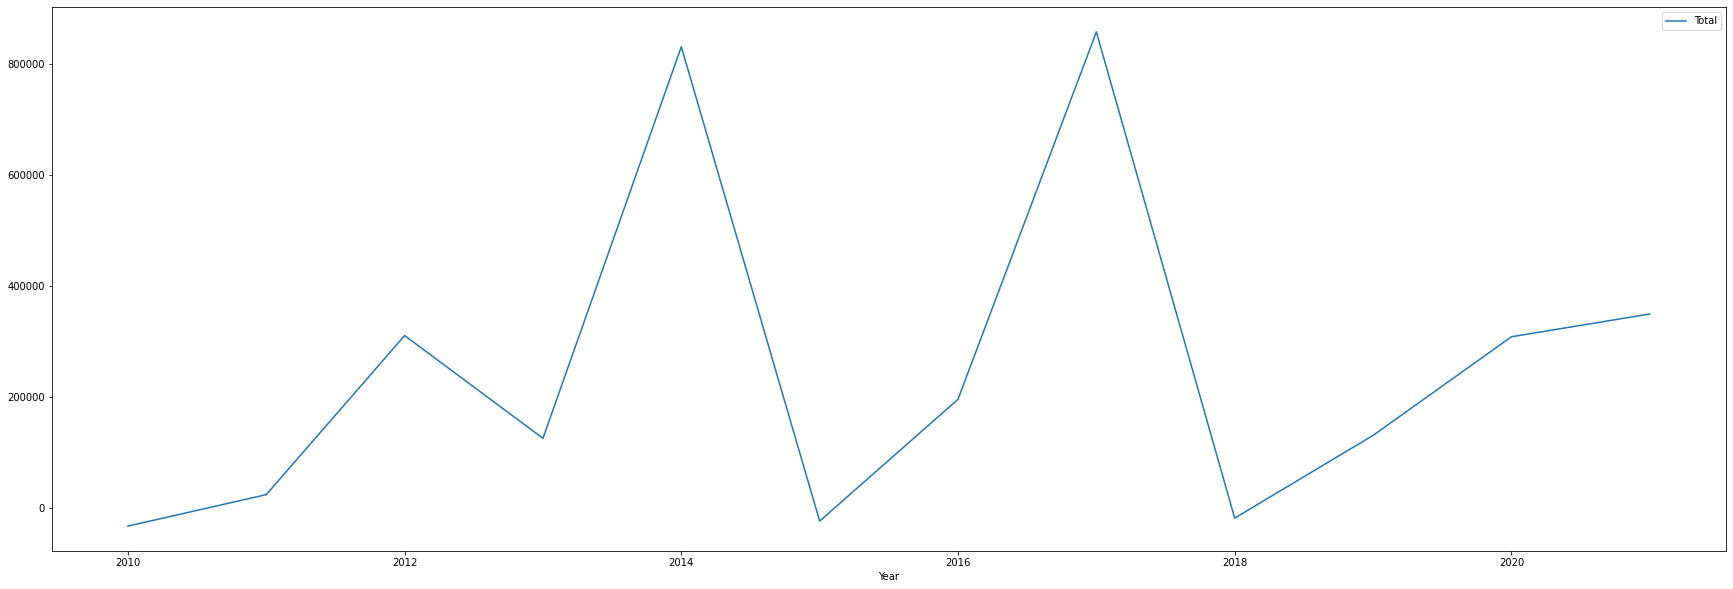

In [109]:
yearwise.plot(y = ["Total"], x= "Year", figsize=(30,10))

<AxesSubplot:xlabel='Year'>

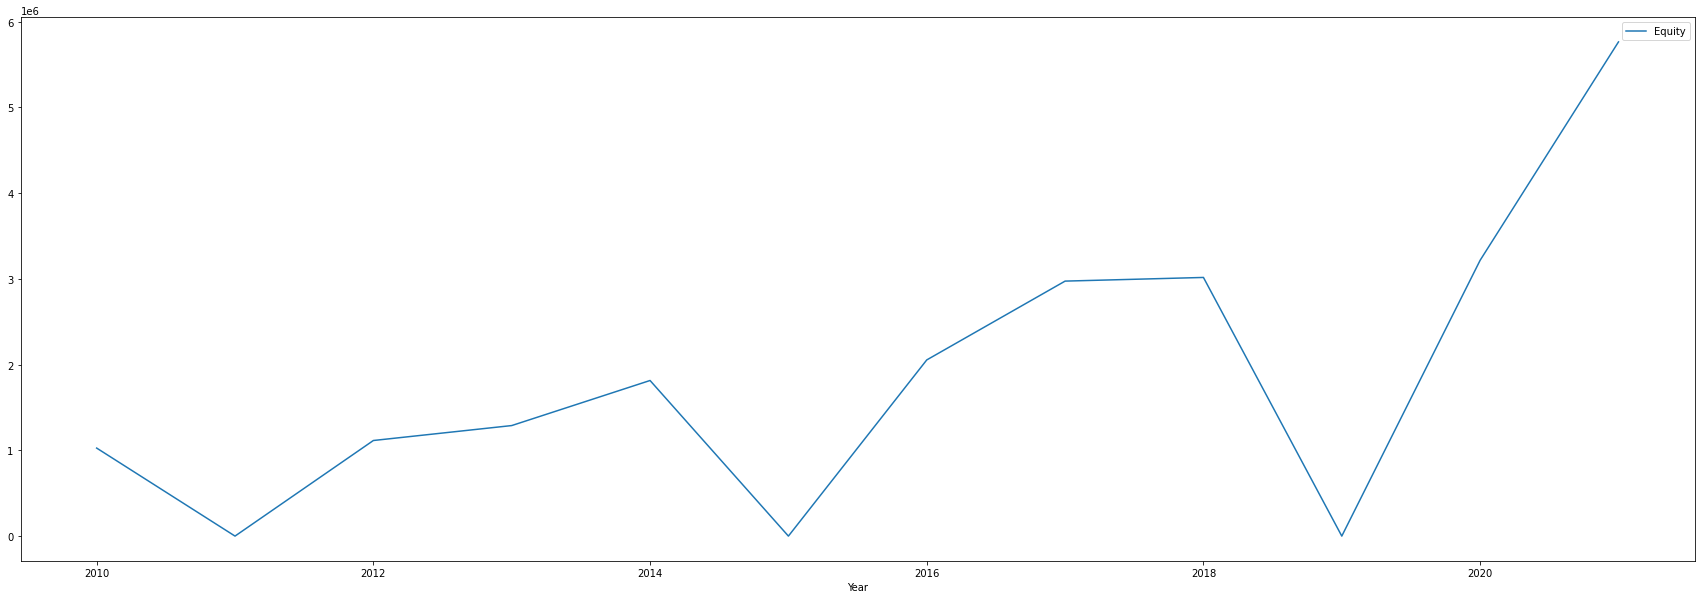

In [110]:
yearwise.plot(y = ["Equity"], x= "Year", figsize=(30,10))